# Learning Curves

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
def read_log(path_to_log):
    results = []
    with open(path_to_log, "r") as fin:
        for line in fin:
            if "val loss" not in line:
                continue
            parts = line.strip().split()
            results.append(
                (int(parts[1][:-1]), float(parts[-1]))
            )
    return np.array(results)

In [16]:
logs = sorted(Path("shakespeare-char").glob("*/log.log"))
sorted(logs)

[PosixPath('shakespeare-char/nano-h2/log.log'),
 PosixPath('shakespeare-char/nano-h4/log.log'),
 PosixPath('shakespeare-char/nano-h4-d124/log.log'),
 PosixPath('shakespeare-char/qka-h2/log.log'),
 PosixPath('shakespeare-char/qka-h4/log.log'),
 PosixPath('shakespeare-char/tangled/log.log')]

In [17]:
results = {
    l.parent.name: read_log(l) for l in logs if "qka" not in l.parent.name
}

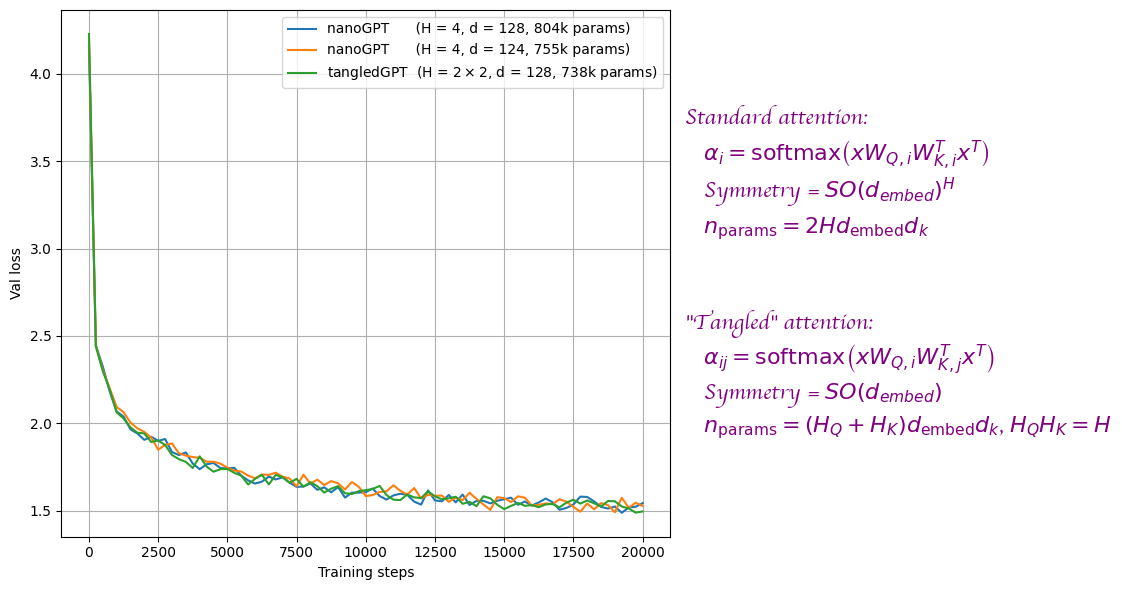

In [35]:
fig, axes = plt.subplots(
    1, 2, figsize=(12, 6), 
    gridspec_kw=dict(
        width_ratios=[3, 2]
    )
)

pi = 0
ti = 1

axes[ti].axis("off")
axes[ti].text(
    0, 
    0.5,
    "Standard attention:\n   "
    r"$\alpha_{i} = \text{softmax}\left(x W_{Q, i} W_{K, i}^T x^T\right)$"
    "\n   "
    r"Symmetry = $SO(d_{embed})^H$"
    "\n   "
    r"$n_{\text{params}} = 2 H d_{\text{embed}} d_k$"
    "\n\n\n\"Tangled\" attention:\n   "
    r"$\alpha_{ij} = \text{softmax}\left(x W_{Q, i} W_{K, j}^T x^T\right)$"
    "\n   "
    r"Symmetry = $SO(d_{embed})$"
    "\n   "
    r"$n_{\text{params}} = (H_Q + H_K) d_{\text{embed}} d_k$, $H_Q H_K = H$",
    ha="left",
    va="center",
    fontsize=16,
    fontdict=dict(
        family="cursive",
        color="purple"
    )
)

for l, r in results.items():
    if l == "nano-h4":
        _label = f"{'nanoGPT':<13}(H = 4, d = 128, 804k params)"
    elif l == "nano-h4-d124":
        _label = f"{'nanoGPT':<13}(H = 4, d = 124, 755k params)"
    elif l == "nano-h2":
        continue
        _label = f"{'nanoGPT':<13}(H = 2, 804k params)"
    elif l == "qka-h2-shakespeare-char":
        _label = f"{'querkeyGPT':<12}(H = 2, 804k params)"
    elif l == "qka-h4-shakespeare-char":
        _label = f"{'querkeyGPT':<12}(H = 4, 935k params)"
    elif l == "tangled":
        _label = fr"{'tangledGPT':<12}(H = $2 \times 2$, d = 128, 738k params)"
    else:
        print(f"label not defined for {l}!")
        continue
    axes[pi].plot(r[:,0], r[:,1], label=_label)
axes[pi].legend(loc="upper right")
axes[pi].grid()
axes[pi].set_xlabel("Training steps")
axes[pi].set_ylabel("Val loss")

plt.tight_layout()
plt.show()

In [77]:
212 * 162

34344